# Library Usage Examples

author: camen  
last run: Jan 2, 2020

In [1]:
import datetime

import xarray as xr

from wildfire import goes
from wildfire.threshold_model import model

LOCAL_DIRECTORY = "temporary_output"

## Introduction

This library provides useful wrappers around NOAA's GOES-R series satellite data hosted in Amazon S3. This notebook provides some example usage of various parts of the library.

## Contents

1. [Downloading](#Downloading)
2. [GoesBand](#GoesBand)
3. [GoesScan](#GoesScan)
4. [GoesSequence](#GoesSequence)
5. [Wildfire Prediction](#Wildfire-Prediction)

## Downloading

### Single File

In [5]:
filepath = goes.downloader.persist_s3(
    s3_bucket="noaa-goes16", 
    s3_key="ABI-L1b-RadM/2019/050/07/OR_ABI-L1b-RadM1-M3C01_G16_s20190500705208_e20190500705266_c20190500705307.nc",
    local_directory=LOCAL_DIRECTORY
)

xr.open_dataset(filepath)

<xarray.Dataset>
Dimensions:                                 (band: 1, num_star_looks: 24, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 1000, y: 1000)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.11984 ... 0.091868006
  * x                                       (x) float32 -0.014 ... 0.013971999
    y_image                                 float32 ...
    x_image                                 float32 ...
    band_id                                 (band) int8 ...
    band_wavelength                         (band) float32 ...
    t_star_look                             (num_star_looks) datetime64[ns] ...
    band_wavelength_star_look               (num_star_looks) float32 ...
Dimensions without coordinates: band, num_star_looks, number_of_image_bounds, number_of_time_bounds
Data variables:
    Rad                                     (y, x) float32 ...
    DQF                             

### Batch

In [9]:
# let's get all scans matching the parameters:
#     satellite = GOES 17
#     regions = Mesoscale 1 and CONUS
#     channels = Bands 7 and 9
#     start = January 1, 2019 1:01 AM UTC
#     end = January 1, 2019 1:03 AM UTC

scan_object_summaries = goes.downloader.query_s3(
    satellite="noaa-goes17", 
    regions=["M1", "C"], 
    channels=[7, 9], 
    start=datetime.datetime(2019, 1, 1, 1, 1), 
    end=datetime.datetime(2019, 1, 1, 1, 3, 59)
)

goes.downloader.download_batch(s3_object_summaries=scan_object_summaries, local_directory=LOCAL_DIRECTORY)

['temporary_output/noaa-goes17/ABI-L1b-RadM/2019/001/01/OR_ABI-L1b-RadM1-M3C07_G17_s20190010101270_e20190010101338_c20190010101359.nc',
 'temporary_output/noaa-goes17/ABI-L1b-RadM/2019/001/01/OR_ABI-L1b-RadM1-M3C07_G17_s20190010102270_e20190010102338_c20190010102358.nc',
 'temporary_output/noaa-goes17/ABI-L1b-RadM/2019/001/01/OR_ABI-L1b-RadM1-M3C07_G17_s20190010103270_e20190010103338_c20190010103358.nc',
 'temporary_output/noaa-goes17/ABI-L1b-RadM/2019/001/01/OR_ABI-L1b-RadM1-M3C09_G17_s20190010101270_e20190010101332_c20190010101360.nc',
 'temporary_output/noaa-goes17/ABI-L1b-RadM/2019/001/01/OR_ABI-L1b-RadM1-M3C09_G17_s20190010102270_e20190010102333_c20190010102359.nc',
 'temporary_output/noaa-goes17/ABI-L1b-RadM/2019/001/01/OR_ABI-L1b-RadM1-M3C09_G17_s20190010103270_e20190010103333_c20190010103358.nc',
 'temporary_output/noaa-goes17/ABI-L1b-RadC/2019/001/01/OR_ABI-L1b-RadC-M3C07_G17_s20190010102190_e20190010104574_c20190010105001.nc',
 'temporary_output/noaa-goes17/ABI-L1b-RadC/2019/

## GoesBand

In [43]:
goes_band = goes.get_goes_band(satellite="noaa-goes17", region="M1", band=7, scan_time_utc=datetime.datetime(2019, 10, 27, 20, 5))

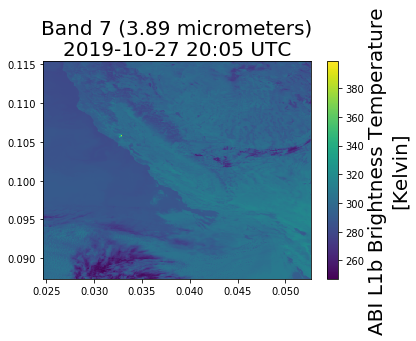

In [24]:
goes_band.plot();

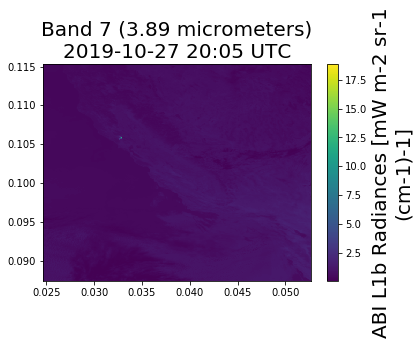

In [25]:
goes_band.plot(use_radiance=True);

## GoesScan

In [3]:
%%time
goes_scan = goes.get_goes_scan(satellite="noaa-goes17", region="M1", scan_time_utc=datetime.datetime(2019, 10, 27, 20, 5))

CPU times: user 1.51 s, sys: 344 ms, total: 1.86 s
Wall time: 19.2 s


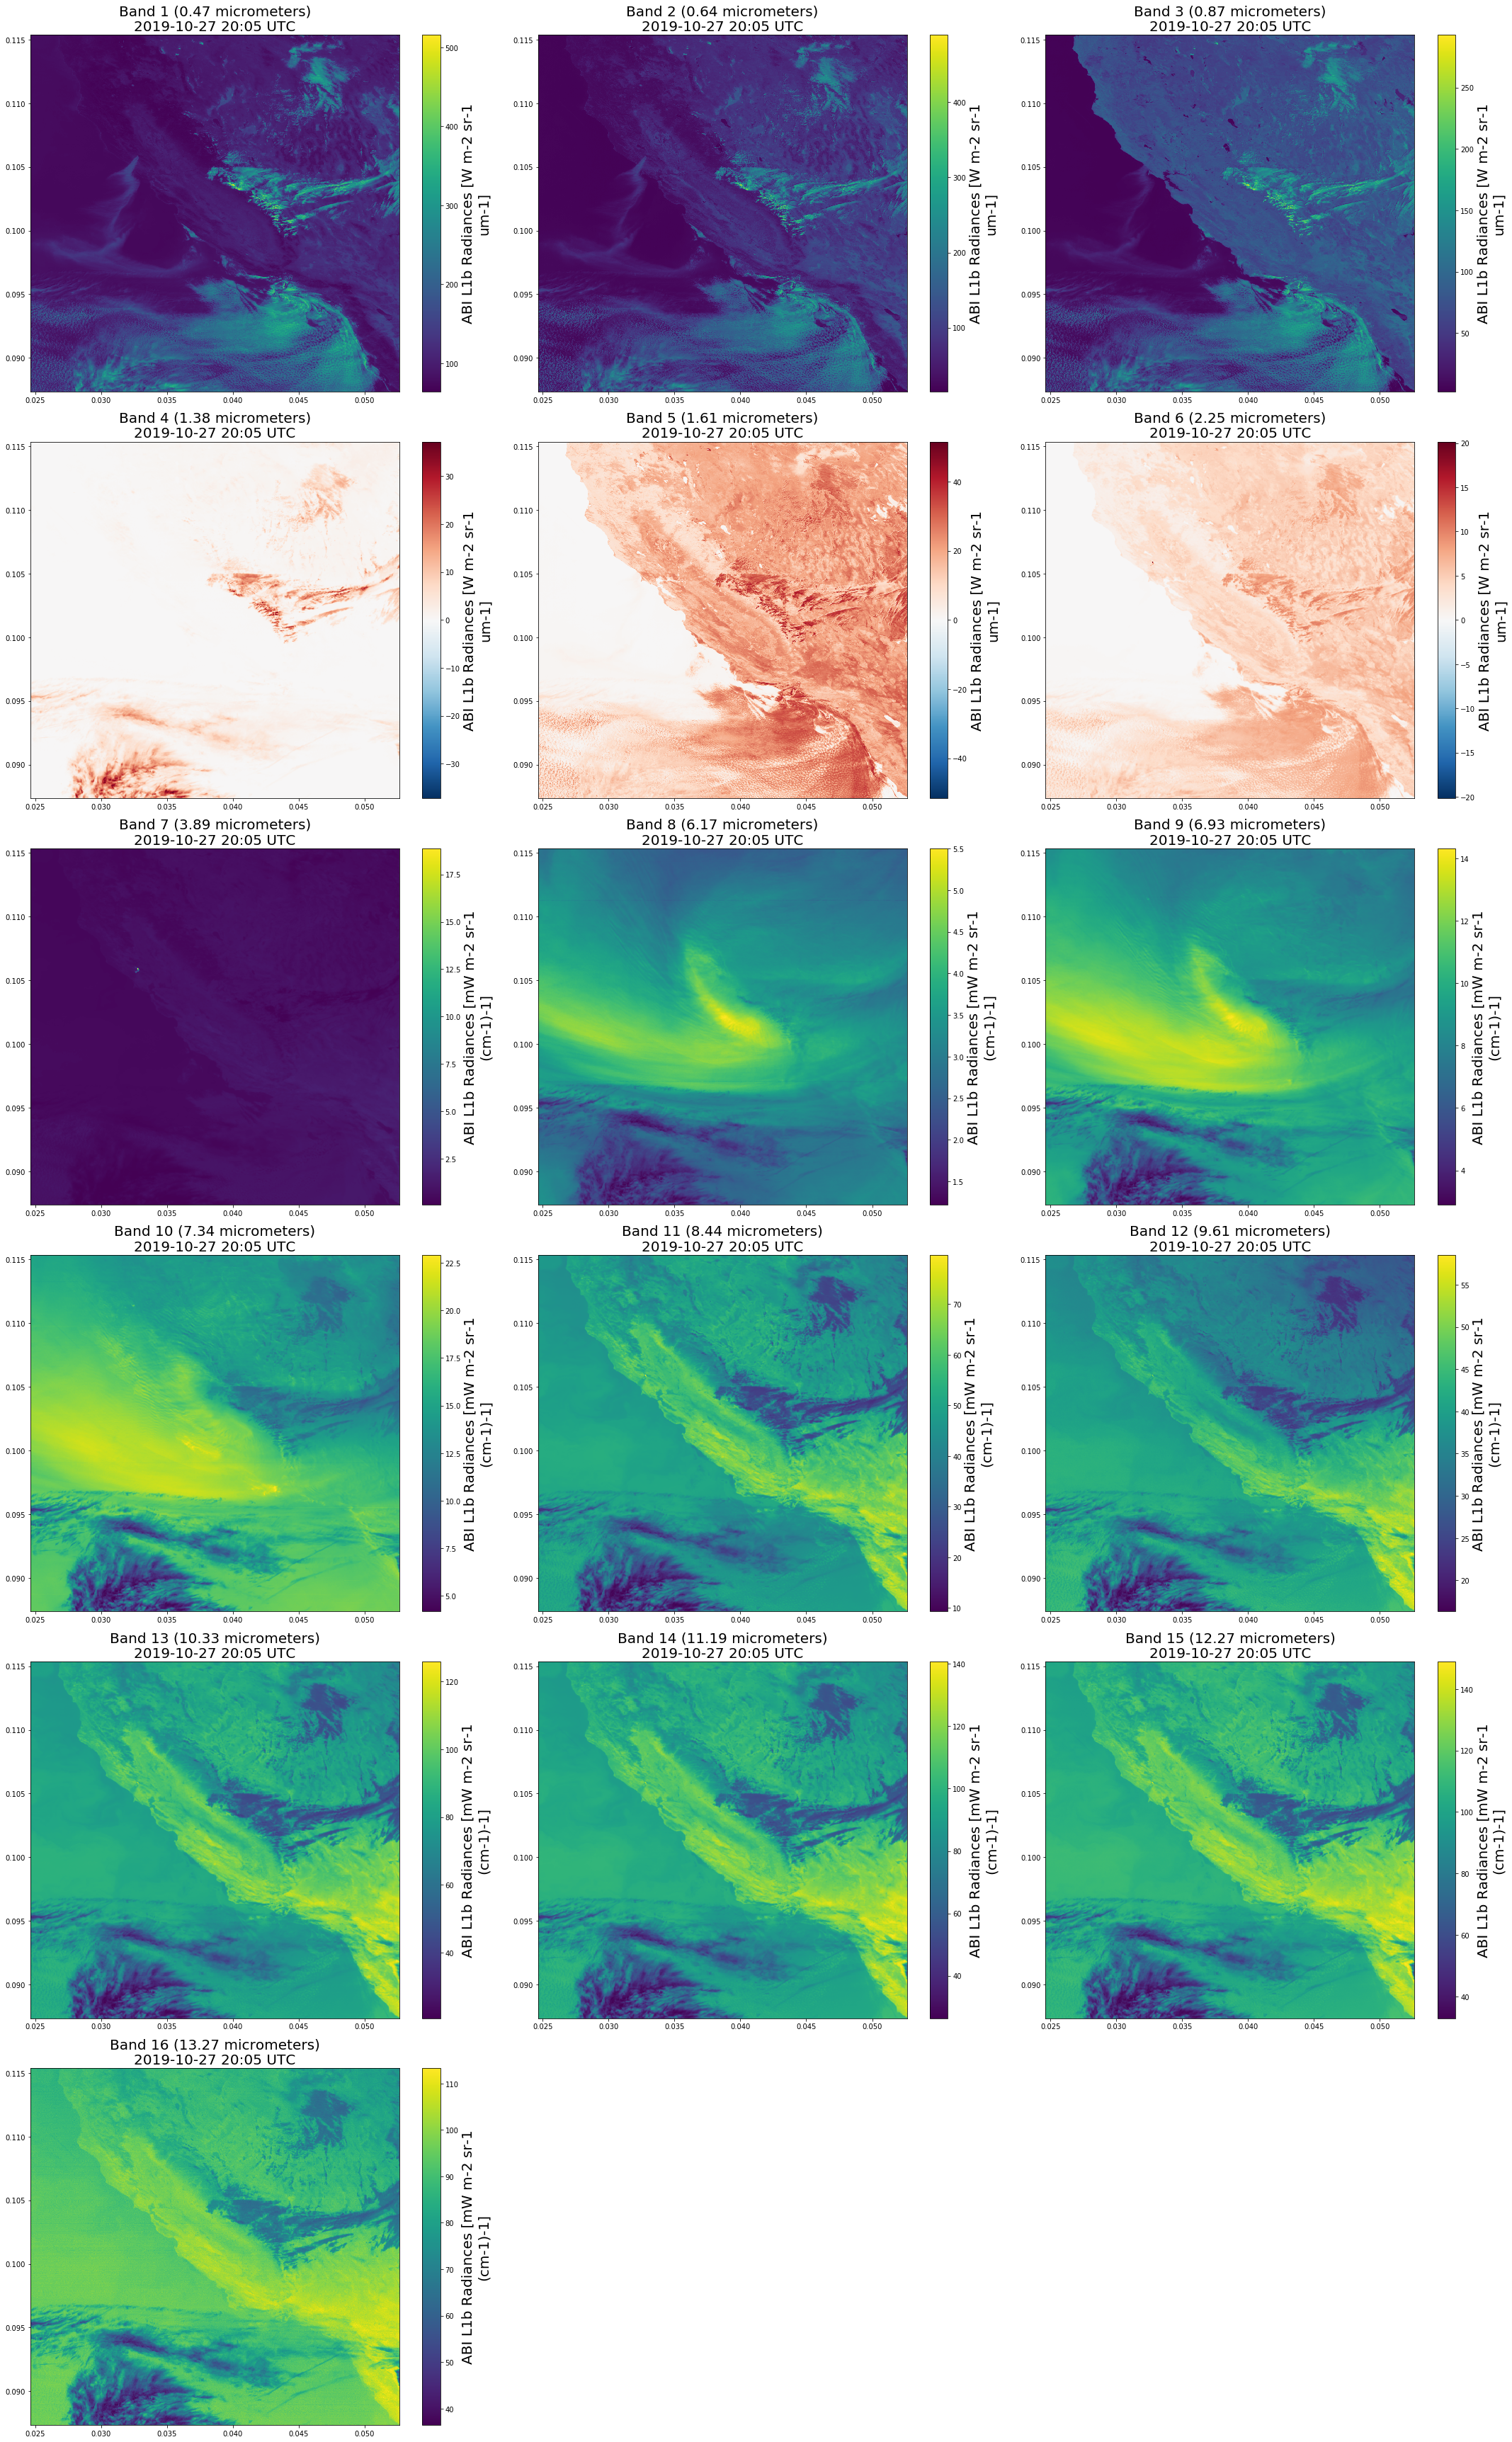

In [33]:
goes_scan.plot(bands=list(range(1, 17)), use_radiance=True);

In [60]:
print("Original Shape: ", goes_scan["band_2"].dataset.Rad.shape)
print("Rescaled Shape: ", goes_scan.rescale_to_500m()["band_2"].dataset.Rad.shape)

Original Shape:  (2000, 2000)
Rescaled Shape:  (500, 500)


In [ ]:
next_scan = goes_scan.next()
print("Original Scan Time: ", goes_scan.scan_time_utc)
print("Original Scan Time: ", goes_scan.scan_time_utc)

In [27]:
dir(goes_scan)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_parse_input',
 'bands',
 'iteritems',
 'keys',
 'next',
 'plot',
 'previous',
 'region',
 'rescale_to_500m',
 'satellite',
 'scan_time_utc',
 'to_netcdf']

## GoesSequence

In [35]:
goes_sequence = goes.get_goes_sequence(
    satellite="noaa-goes17", 
    region="M1", 
    start_time_utc=datetime.datetime(2019, 10, 27, 20, 5), 
    end_time_utc=datetime.datetime(2019, 10, 27, 21, 4), 
    max_scans_per_hour=2
)

In [36]:
dir(goes_sequence)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_parse_input',
 'first_scan_utc',
 'iteritems',
 'keys',
 'last_scan_utc',
 'plot',
 'region',
 'satellite',
 'scans',
 'to_netcdf']

In [ ]:
goes_sequence = goes.get_goes_sequence(
    satellite="noaa-goes17", 
    region="M1", 
    start_time_utc=datetime.datetime(2019, 10, 27, 20, 5), 
    end_time_utc=datetime.datetime(2019, 10, 27, 21, 4), 
    max_scans_per_hour=2
)
for scan_time, scan in goes_sequence.iteritems():
    # does scan have wildfire
    # if yes, add row to csv
    # if not, continue

## Wildfire Prediction

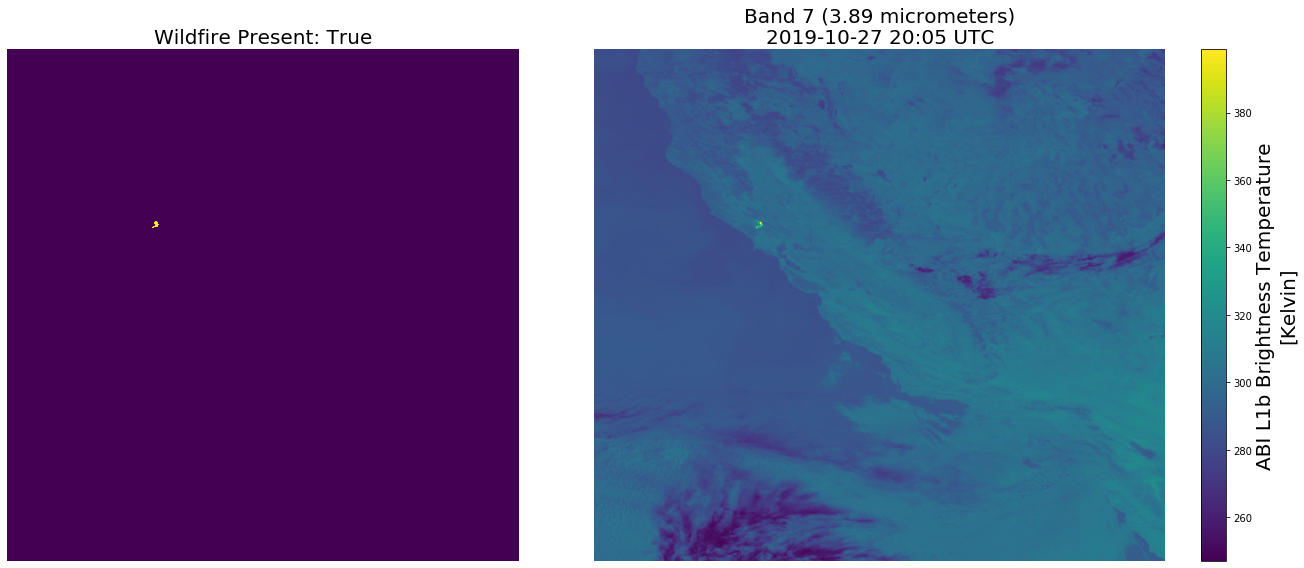

In [41]:
model.plot_wildfires(goes_scan);

In [4]:
%%time
a = goes.downloader.query_s3(satellite="noaa-goes17", regions=["M1"], channels=list(range(1, 17)), start=datetime.datetime(2019, 10, 1, 0), end=datetime.datetime(2019, 10, 1, 1))

CPU times: user 760 ms, sys: 29.7 ms, total: 789 ms
Wall time: 4.55 s


In [3]:
%%time
a = goes.downloader.query_s3(satellite="noaa-goes17", regions=["M1"], channels=list(range(1, 17)), start=datetime.datetime(2019, 10, 1, 0), end=datetime.datetime(2019, 10, 2, 0))

CPU times: user 9.31 s, sys: 233 ms, total: 9.55 s
Wall time: 41.4 s


In [6]:
(41 * 7) / 60

4.783333333333333